## 識別まとめ用：各ボクセルのTimeSeries

各被験者ごとに全ボクセルの識別率をまとめたcsv,pngを出力  
* ACCURAY\_(被験者名)\_voxels.csv/ACCURACY\_(被験者名)\_voxels.png  
  
全被験者の全ボクセルの識別率をまとめたcsv,pngを出力  
* ACCURACY\_allsub_voxels.csv/ACCYRACY\_allsub_voxels.png

In [1]:
import numpy as np
import pandas as pd
import sys
import os

# .pyで実行するときは%matplotlib inlineをコメントアウト！！！！
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#args = sys.argv
#PATH = args[1]

# jupyter notebookのときはここで指定
PATH = '../State-2fe_Active/'


# ------- 書き換え ------- #

resultName = 'Result1111voxels'

# ----------------------- #

# Result[日付]のディレクトリ名・パス
DIR_result = PATH + resultName
PATH_result = DIR_result + '/'

# すでに存在する場合は何もせず，存在していない場合はディレクトリ作成
if not os.path.exists(DIR_result):
    os.mkdir(DIR_result) 


DIR_sub = ['20181029rn/', '20181029su/', '20181029tm/']
DIR_ch = ['64ch/', 'mb/']
DIR_data = '8divData/'


nameList = ['SubjectA', 'SubjectB', 'SubjectC']

csvName = ['ACCURACY[loo]_voxels_SVM.csv']

ch_index = ['64ch', 'mb']


# AcBar関数  

In [3]:
def AcBar(ac_plt, name):

    plt.figure()

    ac_plt.plot.bar(color = ['gray'],
               width = 0.8, figsize = (16,9), rot = 0, fontsize = 15, legend='reverse',
               yticks = [10,20,30,40,50,60,70,80,90,100])

    PATH_plt = PATH + PATH_result + 'ACCURACY_' + name + '_voxels.png'
    print(PATH_plt)
    plt.savefig(PATH_plt)
    
    plt.close('all')



# AcBarAll関数

In [4]:
def AcBarAll(ac_plt, name):
    
    plt.figure()

    ac_plt.plot.bar(color = ['darkblue', 'royalblue', 'cornflowerblue', 'lightsteelblue', 'powderblue', 'paleturquoise', 'lavender'],
               width = 0.8, figsize = (16,9), rot = 0, fontsize = 15, legend='reverse',
               yticks = [10,20,30,40,50,60,70,80,90,100])

    PATH_plt = PATH + PATH_result + 'ACCURACY_' + name + '_voxels.png'
    print(PATH_plt)
    plt.savefig(PATH_plt)
    
    plt.close('all')

# AcBarAM関数

In [5]:
def AcBarAM(ac_plt, name):
    
    plt.figure()

    ac_plt.plot.bar(color = ['darkblue', 'royalblue', 'cornflowerblue', 'lightsteelblue', 'powderblue', 'paleturquoise', 'lavender',
                             'darkred', 'firebrick', 'crimson', 'red', 'salmon', 'lightsalmon', 'peachpuff'],
               width = 0.8, figsize = (16,9), rot = 0, fontsize = 15, legend='reverse',
               yticks = [10,20,30,40,50,60,70,80,90,100])

    PATH_plt = PATH + PATH_result + 'ACCURACY_' + name + '_voxels.png'
    print(PATH_plt)
    plt.savefig(PATH_plt)
    
    plt.close('all')

In [6]:
######## 各被験者識別率 ##########

print('--------- all subject list ----------')


for ch in DIR_ch:
    
    ac_all = pd.DataFrame(index = [], columns = [])
    
    count = 0

    for sub in DIR_sub:
        
        for file in csvName:
        
            # 読み込むファイルまでのパス
            PATH_ac = PATH + sub + ch + DIR_data + file
            
            # csv読み込み
            ac_voxels = pd.read_csv(PATH_ac, index_col = 0, header = 0)
            
            # 被験者,ヘッドコイル名取得
            sub_name = nameList[count]
            ch_name = ch.split('/')[0]
            outputName = sub_name + '_' + ch_name
            
            ac_voxels.columns = [sub_name]
            
            AcBar(ac_voxels, outputName)
            
            ac_all = pd.concat([ac_all, ac_voxels], axis = 1)
        
        count = count + 1
            
    ac_all = ac_all.T

    # csv書きだし
    PATH_csv = PATH + PATH_result + 'ACCURACY_allsub_' + ch_name + '_voxels.csv'
    print(PATH_csv)

    ac_all.to_csv(PATH_csv)
    
    AcBarAll(ac_all, 'allsub_' + ch_name)
    
    

--------- all subject list ----------
../State-2fe_Active/../State-2fe_Active/Result1111voxels/ACCURACY_SubjectA_64ch_voxels.png
../State-2fe_Active/../State-2fe_Active/Result1111voxels/ACCURACY_SubjectB_64ch_voxels.png
../State-2fe_Active/../State-2fe_Active/Result1111voxels/ACCURACY_SubjectC_64ch_voxels.png
../State-2fe_Active/../State-2fe_Active/Result1111voxels/ACCURACY_allsub_64ch_voxels.csv
../State-2fe_Active/../State-2fe_Active/Result1111voxels/ACCURACY_allsub_64ch_voxels.png
../State-2fe_Active/../State-2fe_Active/Result1111voxels/ACCURACY_SubjectA_mb_voxels.png
../State-2fe_Active/../State-2fe_Active/Result1111voxels/ACCURACY_SubjectB_mb_voxels.png
../State-2fe_Active/../State-2fe_Active/Result1111voxels/ACCURACY_SubjectC_mb_voxels.png
../State-2fe_Active/../State-2fe_Active/Result1111voxels/ACCURACY_allsub_mb_voxels.csv
../State-2fe_Active/../State-2fe_Active/Result1111voxels/ACCURACY_allsub_mb_voxels.png


In [7]:
# --------- 上記をActiveとMotorで実行した後 ------------- #

####### 各被験者，全チャンネル #########

indexName = ['SubjectA', 'SubjectB', 'SubjectC']
colNameA = ['ActiveVoxel1', 'ActiveVoxel2', 'ActiveVoxel3', 'ActiveVoxel4', 'ActiveVoxel5', 'ActiveVoxel6', 'ActiveVoxel7']
colNameM = ['MotorVoxel1', 'MotorVoxel2', 'MotorVoxel3', 'MotorVoxel4', 'MotorVoxel5', 'MotorVoxel6', 'MotorVoxel7']


PATH_a64 = '../State-2fe_Active/' + resultName + '/ACCURACY_allsub_64ch_voxels.csv'
data_a64 = pd.read_csv(PATH_a64, header = 0, index_col = 0)
data_a64.index = indexName
data_a64.columns = colNameA

PATH_m64 = '../State-2fe_Motor/' + resultName + '/ACCURACY_allsub_64ch_voxels.csv'
data_m64 = pd.read_csv(PATH_m64, header = 0, index_col = 0)
data_m64.index = indexName
data_m64.columns = colNameM

PATH_amb = '../State-2fe_Active/' + resultName + '/ACCURACY_allsub_mb_voxels.csv'
data_amb = pd.read_csv(PATH_amb, header = 0, index_col = 0)
data_amb.index = indexName
data_amb.columns = colNameA

PATH_mmb = '../State-2fe_Motor/' + resultName + '/ACCURACY_allsub_mb_voxels.csv'
data_mmb = pd.read_csv(PATH_mmb, header = 0, index_col = 0)
data_mmb.index = indexName
data_mmb.columns = colNameM

In [8]:
data_64 = pd.concat([data_a64, data_m64], axis = 1)
data_64 = data_64.sort_index()

AcBarAM(data_64, '64ch')

../State-2fe_Active/../State-2fe_Active/Result1111voxels/ACCURACY_64ch_voxels.png


In [9]:
data_mb = pd.concat([data_amb, data_mmb], axis = 1)
data_mb = data_mb.sort_index()

AcBarAM(data_mb, 'mb')

../State-2fe_Active/../State-2fe_Active/Result1111voxels/ACCURACY_mb_voxels.png


# M2seminar用

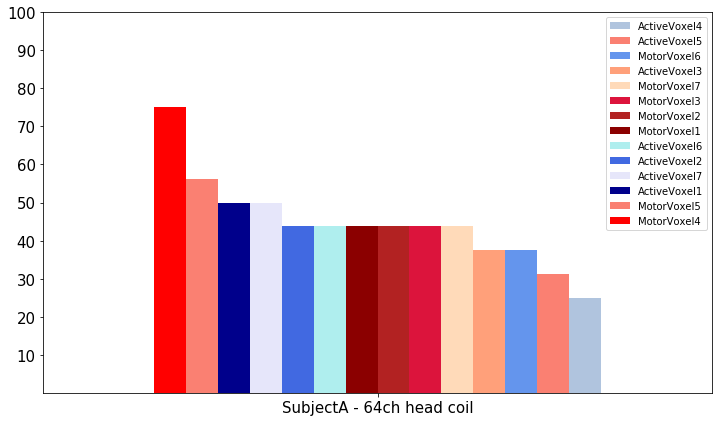

In [10]:
sort_A64 = pd.DataFrame(data_64.iloc[0,:]).T
sort_A64 = sort_A64.sort_values('SubjectA', axis = 1, ascending = False)
sort_A64.index = ['SubjectA - 64ch head coil']

plt.figure()

sort_A64.plot.bar(color = ['red', 'salmon', 'darkblue', 'lavender', 'royalblue','paleturquoise','darkred',
                           'firebrick', 'crimson','peachpuff', 'lightsalmon', 'cornflowerblue', 'salmon', 'lightsteelblue', 'powderblue',],
           width = 1, figsize = (12,7), rot = 0, fontsize = 15, legend='reverse',
           yticks = [10,20,30,40,50,60,70,80,90,100])

# PATH_plt = PATH + PATH_result + 'ACCURACY_voxelsrank.png'
# print(PATH_plt)
# plt.savefig(PATH_plt)

# plt.close('all')

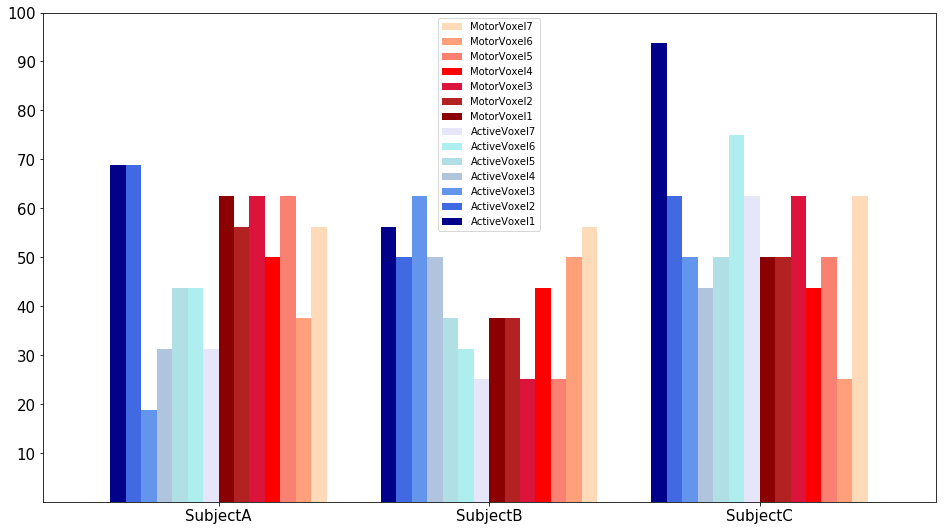

In [11]:
plt.figure()

data_mb.plot.bar(color = ['darkblue', 'royalblue', 'cornflowerblue', 'lightsteelblue', 'powderblue', 'paleturquoise', 'lavender',
                         'darkred', 'firebrick', 'crimson', 'red', 'salmon', 'lightsalmon', 'peachpuff'],
           width = 0.8, figsize = (16,9), rot = 0, fontsize = 15, legend='reverse',
           yticks = [10,20,30,40,50,60,70,80,90,100])